<a href="https://colab.research.google.com/github/AilingLiu/Survival_analysis/blob/master/python_function_and_log_rank_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', linewidth=1.5)

In [6]:
data_link = 'https://raw.githubusercontent.com/AilingLiu/Survival_analysis/master/Data/simulated%20HF%20mort%20data%20for%20GMPH%20(1K)%20final.csv'

hf = pd.read_csv(data_link, index_col='id')
hf.head()

,death,los,age,gender,cancer,cabg,crt,defib,dementia,diabetes,hypertension,ihd,mental_health,arrhythmias,copd,obesity,pvd,renal_disease,valvular_disease,metastatic_cancer,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,2,90,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,4,0,0,0,0,2.0,NaN,416
2,0,10,74,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,9,1,0,0,0,4.0,1.0,648
3,0,3,83,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3.0,1.0,466
4,0,1,79,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,9,2,1,1,0,5.0,1.0,441
5,0,17,94,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,2.0,1.0,371


 Note:
 <br> gender=1 is male and gender=2 is female

In [0]:
#!pip install lifelines

Survival probability for male

In [37]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

male_mask = hf.gender==1
T = hf[male_mask]['fu_time']
C = hf[male_mask]['death']

kmf.fit(T, event_observed=C)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 548 total observations, 280 right-censored observations>

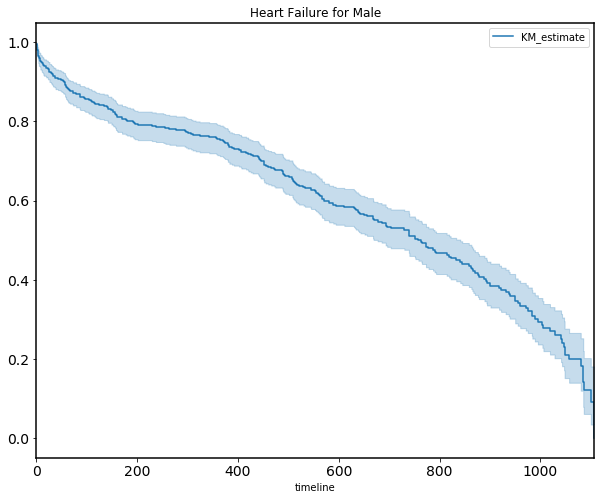

In [38]:
kmf.plot(title='Heart Failure for Male', figsize=(10, 8))

survival probability for both male and female

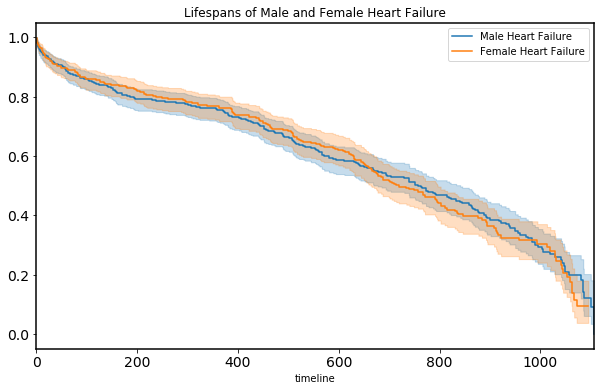

In [46]:
female_mask = hf.gender==2
T2 = hf[female_mask]['fu_time']
C2 = hf[female_mask]['death']

kmf.fit(T, event_observed=C, label='Male Heart Failure')
ax = kmf.plot(figsize=(10, 6))

kmf.fit(T2, event_observed=C2, label='Female Heart Failure')
kmf.plot(ax=ax)

plt.title('Lifespans of Male and Female Heart Failure')
plt.legend(loc='upper right')
plt.show()

Log rank test

Null Hypothesis:

The survival rates over time between Male and Female are the same.

In [0]:
from lifelines.statistics import logrank_test
lgtest = logrank_test(T, T2, C, C2, alpha=99)

In [52]:
lgtest.print_summary()